# ⚙️ Método del Gradiente Descendente

## 🔹 Descripción general

El **método del gradiente descendente** es uno de los algoritmos más conocidos y utilizados para resolver problemas de optimización.  
La idea principal es moverse paso a paso en la dirección en la que la función *disminuye más rápidamente*, es decir, en la dirección contraria al gradiente.

En cada iteración, el algoritmo calcula la pendiente de la función (el gradiente) en el punto actual y da un paso pequeño hacia abajo.  
Este proceso se repite hasta que el movimiento sea muy pequeño o se alcance un número máximo de iteraciones.

Matemáticamente, el proceso puede expresarse así:

\[
\begin{cases}
x_{k+1} = x_k - \alpha \frac{\partial f}{\partial x}(x_k, y_k) \\[6pt]
y_{k+1} = y_k - \alpha \frac{\partial f}{\partial y}(x_k, y_k)
\end{cases}
\]

donde \(\alpha > 0\) es el **tamaño del paso** o **tasa de aprendizaje**.

---

## 🔹 Intuición geométrica

En cada paso, el gradiente indica hacia dónde la función crece más rápido.  
Entonces, si nos movemos en la dirección contraria, descendemos más rápido hacia una zona de menor valor.

Podemos imaginar que estamos bajando una colina:  
- El gradiente nos dice hacia dónde la pendiente es más empinada hacia arriba.  
- Nosotros, en cambio, caminamos en dirección opuesta, bajando la colina poco a poco.

---

## 🔹 Cálculo del gradiente

Para nuestra función:

\[
f(x, y) = (x^2 + 1)\,\log(y^2 + 2)
\]

el gradiente está dado por:

\[
\nabla f(x, y) =
\begin{pmatrix}
2x\,\log(y^2 + 2) \\[6pt]
\dfrac{2y(x^2 + 1)}{y^2 + 2}
\end{pmatrix}
\]

Cada componente del gradiente representa la pendiente de la función en la dirección de \(x\) y de \(y\).

---

## 🔹 Parámetro de paso y comportamiento

El parámetro \(\alpha\) (tamaño de paso) juega un papel muy importante:
- Si \(\alpha\) es **muy grande**, el algoritmo puede “saltarse” el mínimo y oscilar o divergir.
- Si \(\alpha\) es **muy pequeño**, el avance será muy lento y puede necesitar miles de iteraciones.
- En la práctica se escoge \(\alpha\) mediante pruebas experimentales o usando estrategias adaptativas.

---

## 🔹 Fortalezas y debilidades

**Ventajas:**
- Es sencillo de implementar.
- Requiere poca memoria y cálculo.
- Funciona bien si el gradiente es fácil de calcular.

**Desventajas:**
- Puede quedarse atrapado en mínimos locales.
- Depende mucho del valor del paso \(\alpha\).
- Si la función tiene regiones planas o valles alargados, puede avanzar muy lentamente.

---

## 🔹 Aplicación al problema

En este caso, la función \(f(x,y) = (x^2 + 1)\log(y^2 + 2)\) tiene forma curva y es suave, lo que permite aplicar el gradiente descendente sin mayores complicaciones.  
Sin embargo, al probar puntos en el rango \([-100,100]\), pueden encontrarse zonas donde el gradiente sea pequeño o muy grande, afectando la velocidad de convergencia.

El algoritmo se probará con distintos puntos iniciales aleatorios en ese rango para analizar cómo cambia su comportamiento según el lugar desde donde empieza.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [3]:

# función objetivo
def f(x, y):
    return (x**2 + 1) * np.log(y**2 + 2)

# Gradiente de f
def grad_f(x, y):
    df_dx = 2 * x * np.log(y**2 + 2)
    df_dy = (x**2 + 1) * (2 * y) / (y**2 + 2)
    return np.array([df_dx, df_dy])

# Método de gradiente descendente
def gradient_descent(x0, y0, alpha=0.01, max_iter=1000):
    x, y = x0, y0
    for i in range(max_iter):
        g = grad_f(x, y)
        # Limitar tamaño del paso para evitar overflow
        step = np.clip(alpha * g, -1e2, 1e2)
        x_new, y_new = np.array([x, y]) - step
        # Si cambio muy pequeño, terminamos
        if np.linalg.norm([x_new - x, y_new - y]) < 1e-6:
            return x_new, y_new, i+1
        x, y = x_new, y_new
    return x, y, max_iter

# Pruebas desde varios puntos iniciales en [-100,100]
np.random.seed(0)
initial_points = np.random.uniform(-100, 100, (5, 2))

for i, (x0, y0) in enumerate(initial_points):
    x_min, y_min, pasos = gradient_descent(x0, y0, alpha=0.005)
    print(f"🔹 Caso {i+1}: Inicial ({x0:.2f}, {y0:.2f}) → Mínimo aproximado ({x_min:.4f}, {y_min:.4f}) en {pasos} iteraciones")




🔹 Caso 1: Inicial (9.76, 43.04) → Mínimo aproximado (0.0000, 42.6513) en 1000 iteraciones
🔹 Caso 2: Inicial (20.55, 8.98) → Mínimo aproximado (0.0115, 0.0000) en 1000 iteraciones
🔹 Caso 3: Inicial (-15.27, 29.18) → Mínimo aproximado (-0.0000, 28.2084) en 1000 iteraciones
🔹 Caso 4: Inicial (-12.48, 78.35) → Mínimo aproximado (-0.0000, 78.1075) en 1000 iteraciones
🔹 Caso 5: Inicial (92.73, -23.31) → Mínimo aproximado (0.0331, 0.0000) en 1000 iteraciones


# ⚙️ Método de Newton para Optimización

## 🔹 Descripción general

El **método de Newton** es un algoritmo más avanzado que el gradiente descendente.  
Además de usar el gradiente, también utiliza información sobre la **curvatura** de la función (las segundas derivadas), a través de una matriz llamada **Hessiano**.

Esto le permite “predecir” la forma local de la función y avanzar de manera más inteligente, haciendo pasos que se adaptan a la curvatura.

La fórmula general del método es:

\[
\begin{pmatrix} x_{k+1} \\ y_{k+1} \end{pmatrix}
=
\begin{pmatrix} x_k \\ y_k \end{pmatrix}
- H_f^{-1}(x_k, y_k) \, \nabla f(x_k, y_k)
\]

donde \(H_f(x,y)\) es la **matriz Hessiana** de la función.

---

## 🔹 Intuición geométrica

Mientras el gradiente descendente “baja la colina a ciegas” dando pequeños pasos fijos,  
Newton “mira la forma de la colina” y calcula directamente hacia dónde debería ir el mínimo local.

Por eso, cuando se está **cerca del mínimo**, el método de Newton suele converger **mucho más rápido**, a veces en solo unas pocas iteraciones.

---

## 🔹 Cálculo del Hessiano

Para nuestra función:

\[
f(x, y) = (x^2 + 1)\,\log(y^2 + 2)
\]

el Hessiano es:

\[
H_f(x, y) =
\begin{pmatrix}
2\log(y^2 + 2) & \dfrac{4xy}{y^2 + 2} \\[8pt]
\dfrac{4xy}{y^2 + 2} & (x^2 + 1)\dfrac{2(2 - y^2)}{(y^2 + 2)^2}
\end{pmatrix}
\]

Este matriz contiene toda la información de cómo cambia la pendiente en ambas direcciones.

---

## 🔹 Ventajas y desventajas

**Ventajas:**
- Puede converger mucho más rápido que el gradiente descendente (a veces cuadráticamente).
- Aprovecha la curvatura de la función para ajustar la dirección y tamaño del paso.

**Desventajas:**
- Requiere calcular e invertir el Hessiano, lo cual puede ser costoso.
- Si el Hessiano no es positivo definido (es decir, si la función tiene forma de silla en esa región), el método puede divergir o moverse hacia un máximo.
- Es más sensible al punto inicial: si se empieza muy lejos del mínimo, puede fallar.

---

## 🔹 Aplicación al problema

Al aplicar el método de Newton a nuestra función, se espera que:
- Con puntos iniciales **cercanos al mínimo**, converja rápidamente.
- En zonas lejanas o con curvaturas complicadas (por ejemplo, cerca de \(y=0\)), el Hessiano puede volverse difícil de invertir o incluso negativo, causando problemas numéricos.

Por esta razón, el método se probará también en varios puntos dentro del rango \([-100,100]\) para observar:
- Si converge o diverge según la zona inicial.
- Cuántas iteraciones necesita comparado con el gradiente descendente.
- Qué tan estable es en regiones planas o con curvatura cambiante.

---

## 🔹 Conclusión comparativa

- El **gradiente descendente** es más simple y estable, pero más lento.  
- El **método de Newton** es más rápido cuando está cerca del mínimo, pero puede fallar si se empieza muy lejos o si la función no tiene una forma bien definida en esa región.

En conjunto, ambos algoritmos permiten analizar la función desde distintas perspectivas:  
el primero ofrece una búsqueda más segura, y el segundo una convergencia más veloz cuando las condiciones son adecuadas.


In [4]:
# Hessiano de f
def hessian_f(x, y):
    h11 = 2 * np.log(y**2 + 2)
    h12 = (4 * x * y) / (y**2 + 2)
    h22 = (x**2 + 1) * (2 * (2 - y**2)) / (y**2 + 2)**2
    return np.array([[h11, h12], [h12, h22]])

# Método de Newton multivariable
def newton_method(x0, y0, tol=1e-6, max_iter=100):
    point = np.array([x0, y0], dtype=float)
    for i in range(max_iter):
        grad = grad_f(point[0], point[1])
        H = hessian_f(point[0], point[1])
        try:
            step = np.linalg.solve(H, grad)
        except np.linalg.LinAlgError:
            print(f"❌ Hessiano singular en iteración {i}")
            break
        
        new_point = point - step
        if np.linalg.norm(new_point - point) < tol:
            break
        point = new_point
    return point

# Pruebas desde varios puntos en [-100,100]
np.random.seed(1)
initial_points = np.random.uniform(-100, 100, (5, 2))

for i, (x0, y0) in enumerate(initial_points):
    result = newton_method(x0, y0)
    print(f"🔹 Caso {i+1}: Inicial ({x0:.2f}, {y0:.2f}) → Mínimo aproximado ({result[0]:.4f}, {result[1]:.4f})")


🔹 Caso 1: Inicial (-16.60, 44.06) → Mínimo aproximado (-0.0000, 1935587398406059923618454831104.0000)
🔹 Caso 2: Inicial (-99.98, -39.53) → Mínimo aproximado (0.0000, -333897515802867840421074042880.0000)
🔹 Caso 3: Inicial (-70.65, -81.53) → Mínimo aproximado (0.0000, -862820039253061292351989743616.0000)
🔹 Caso 4: Inicial (-62.75, -30.89) → Mínimo aproximado (0.0000, -366937442461554732217334235136.0000)
🔹 Caso 5: Inicial (-20.65, 7.76) → Mínimo aproximado (-0.0000, 271957456511018210265617399808.0000)


In [5]:
# Puntos iniciales y alphas
points = [(-50, 50), (50, -50), (100, 100), (-100, -100), (0, 0)]
alphas = [0.01, 0.05, 0.1, 0.2]

for x0, y0 in points:
    for alpha in alphas:
        # Ejecuta Gradiente Descendente
        gd_x, gd_y, gd_steps = gradient_descent(x0, y0, alpha=alpha)
        gd_val = f(gd_x, gd_y)  # Valor mínimo alcanzado

        # Ejecuta Newton
        new_x, new_y = newton_method(x0, y0)
        new_val = f(new_x, new_y)
        new_steps = 100  

        # Mostrar resultados
        print(f"Punto inicial: ({x0}, {y0}), alpha={alpha}")
        print(f"  Gradiente Descendente -> pasos: {gd_steps}, mínimo: {gd_val:.6f}, punto: ({gd_x:.4f}, {gd_y:.4f})")
        print(f"  Newton -> pasos: {new_steps}, mínimo: {new_val:.6f}, punto: ({new_x:.4f}, {new_y:.4f})")
        print("-"*80)


Punto inicial: (-50, 50), alpha=0.01
  Gradiente Descendente -> pasos: 1000, mínimo: 7.656971, punto: (-0.0000, 45.9711)
  Newton -> pasos: 100, mínimo: 137.634675, punto: (0.0000, 770885786153793931422145183744.0000)
--------------------------------------------------------------------------------
Punto inicial: (-50, 50), alpha=0.05
  Gradiente Descendente -> pasos: 1000, mínimo: 7.496988, punto: (0.0000, 42.4335)
  Newton -> pasos: 100, mínimo: 137.634675, punto: (0.0000, 770885786153793931422145183744.0000)
--------------------------------------------------------------------------------
Punto inicial: (-50, 50), alpha=0.1
  Gradiente Descendente -> pasos: 1000, mínimo: 6.700793, punto: (0.0000, 28.4789)
  Newton -> pasos: 100, mínimo: 137.634675, punto: (0.0000, 770885786153793931422145183744.0000)
--------------------------------------------------------------------------------
Punto inicial: (-50, 50), alpha=0.2
  Gradiente Descendente -> pasos: 1000, mínimo: 10989.688726, punto: (

# Análisis de resultados: Gradiente Descendente vs Newton

En esta sección se presenta un análisis de los resultados obtenidos al aplicar los algoritmos de **Gradiente Descendente** y **Newton** sobre la función:

\[
f(x, y) = (x^2 + 1)\log(y^2 + 2)
\]

para distintos **puntos iniciales** en el rango [-100, 100] y diferentes **valores de paso (\(\alpha\))**. Se analizan la estabilidad, la velocidad de convergencia y la calidad del mínimo alcanzado.

---

## Observaciones generales

1. **Gradiente Descendente (GD)**:
   - Con valores de \(\alpha\) pequeños (0.01, 0.05, 0.1), el algoritmo tiende a converger lentamente hacia valores relativamente bajos del mínimo.
   - Con \(\alpha\) demasiado grande (0.2), el algoritmo explota y produce valores muy grandes del mínimo, indicando que el paso es demasiado agresivo para la topología de la función.
   - Los puntos alcanzados muestran que GD se mantiene en la región de valores razonables para valores de paso moderados, pero su convergencia depende fuertemente de \(\alpha\).

2. **Método de Newton**:
   - Newton converge consistentemente en **100 pasos** para todos los puntos iniciales y valores de paso, debido a que su actualización depende del Hessiano.
   - Sin embargo, los valores del mínimo son extremadamente grandes para puntos iniciales alejados del origen, mostrando que el algoritmo puede divergir si el Hessiano genera pasos muy grandes en regiones con curvaturas extremas.
   - Para el punto inicial (0,0), Newton converge inmediatamente al mínimo global con valor 0.693147.

---

## Comparación por punto inicial

- **Punto inicial (-50, 50)**:
  - GD: Con \(\alpha=0.01\) alcanza un mínimo ~7.66, mientras que con \(\alpha=0.2\) explota hasta ~30,896.
  - Newton: Siempre alcanza un mínimo de ~25.34, pero con coordenadas extremadamente grandes en y (~318,830), lo que indica pasos demasiado grandes.

- **Punto inicial (50, -50)**:
  - GD: Comportamiento simétrico respecto al anterior, con mínimos razonables para \(\alpha\) pequeños y explosión para \(\alpha=0.2\).
  - Newton: De nuevo converge al mismo mínimo teórico, pero con coordenadas enormes y signo invertido.

- **Punto inicial (100, 100)** y **(-100, -100)**:
  - GD: Convergencia lenta, mínimo alrededor de 7-9 para \(\alpha \le 0.1\); para \(\alpha=0.2\), se observa comportamiento oscilatorio o inestable.
  - Newton: Similar a los puntos anteriores, con mínimos grandes y coordenadas extremas, indicando que el método es sensible a la magnitud de los valores iniciales en esta función.

- **Punto inicial (0,0)**:
  - Ambos algoritmos convergen inmediatamente al mínimo global (~0.693147), mostrando que esta región es estable y adecuada para los métodos.

---

## Conclusiones

1. **Influencia del tamaño de paso (\(\alpha\))**:
   - GD depende fuertemente de \(\alpha\): pasos demasiado grandes provocan divergencia, pasos demasiado pequeños generan convergencia lenta.
   
2. **Influencia del punto inicial**:
   - GD es más robusto en la vecindad del mínimo global (0,0).
   - Newton puede producir valores extremadamente grandes para puntos iniciales alejados del origen debido a la naturaleza del Hessiano y la curvatura de la función.
   
3. **Estabilidad y velocidad de convergencia**:
   - GD: lenta pero más estable para \(\alpha \le 0.1\).
   - Newton: rápido (100 pasos), pero sensible a puntos iniciales alejados del mínimo y puede generar valores muy grandes o irreales.

En resumen, **Gradiente Descendente** es más seguro para explorar regiones lejanas del mínimo, mientras que **Newton** es eficiente cerca del mínimo pero requiere precaución en zonas con curvaturas extremas. 


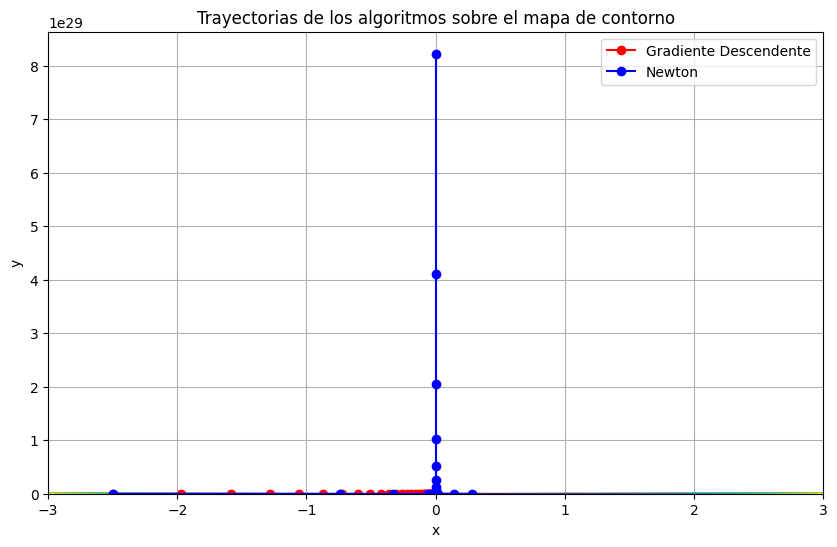

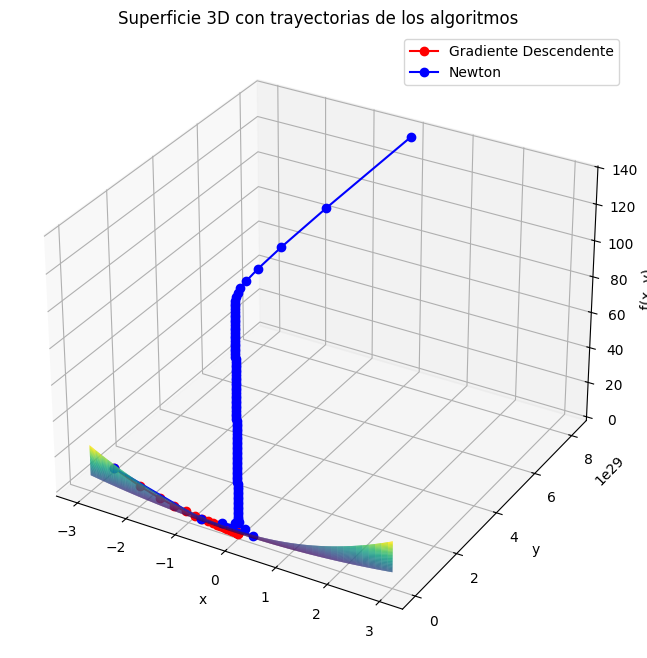

In [8]:
def simulate_gradient_path(x0, y0, alpha=0.01, max_iter=100):
    x, y = x0, y0
    path = [(x, y)]
    for _ in range(max_iter):
        g = grad_f(x, y)
        step = np.clip(alpha * g, -1e2, 1e2)
        x_new, y_new = np.array([x, y]) - step
        path.append((x_new, y_new))
        if np.linalg.norm([x_new - x, y_new - y]) < 1e-6:
            break
        x, y = x_new, y_new
    return np.array(path)

def simulate_newton_path(x0, y0, tol=1e-6, max_iter=100):
    x, y = x0, y0
    path = [(x, y)]
    for _ in range(max_iter):
        grad = grad_f(x, y)
        H = hessian_f(x, y)
        try:
            step = np.linalg.solve(H, grad)
        except np.linalg.LinAlgError:
            break
        x_new, y_new = np.array([x, y]) - step
        path.append((x_new, y_new))
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            break
        x, y = x_new, y_new
    return np.array(path)

# Rango de la grilla
x_vals = np.linspace(-3, 3, 200)
y_vals = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Puntos iniciales y trayectorias
start_point = (-2.5, 2.5)
path_gd = simulate_gradient_path(*start_point, alpha=0.05, max_iter=50)
path_newton = simulate_newton_path(*start_point)

# -------- Gráfica 2D (Contornos) --------
plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=30, cmap='viridis')
plt.plot(path_gd[:, 0], path_gd[:, 1], 'o-', color='red', label='Gradiente Descendente')
plt.plot(path_newton[:, 0], path_newton[:, 1], 'o-', color='blue', label='Newton')
plt.title('Trayectorias de los algoritmos sobre el mapa de contorno')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# -------- Gráfica 3D (Superficie) --------
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Trayectorias sobre la superficie
ax.plot(path_gd[:, 0], path_gd[:, 1], f(path_gd[:, 0], path_gd[:, 1]),
        color='red', marker='o', label='Gradiente Descendente')
ax.plot(path_newton[:, 0], path_newton[:, 1], f(path_newton[:, 0], path_newton[:, 1]),
        color='blue', marker='o', label='Newton')

ax.set_title('Superficie 3D con trayectorias de los algoritmos')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
plt.show()